<a href="https://colab.research.google.com/github/MukeshCTC/ml-learning/blob/main/MAGIC_exampleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

In [ ]:
df["class"].unique()

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df["class"].unique()

Supervised Learning: uses labeled inputs (meaning the input has a corressponding output label) to train the models and learn output

Unsupervised learning - uses unlabeled data to learn about patterns in data

Reinforcement learning - agent learning in interactive environment based on rewards and penalties



Supervised Leaning:
Feature Vector are input to ML to get Output
Feature - Qualitative Feature - Categorical data (Finite number of categories or group) Ex Gender (G, B), Nationalities (Nominal Data - no inherent order)

Nominal to feed into computer we can use
ONE-HOT ENCODING [USA, INDIA, CANADA, FRANCE] <---- 1 if matches the category
USA - [1,0,0,0]
INDIA - [0, 1, 0, 0]
Canada - [0, 0, 1, 0]
FRANCE - [0, 0, 0, 1]

ORDINAL Data (inherent order) Ex Age group (Baby, thin ager, young adult, adult, aged)

Quntitative Features - numerical valued data (Could be dicrete or continuous)

Different classes of prediction in Supervised Learning Tasks
1. Classification - Predict discrte classes
  - Binary Classification (Positive/Negative, Cat/Dog, Spam/Not Spam)
  - Multiclass Classification - (Cat/Dog/Lizard/Dolphin), (Orange/apple/pear)
2. Regression - Predict Continuous values

Model:
- How do we make the model learn?
- How can we tell whether or not it's learning?

Dataset - Training Data set, Validation Data set, and Testing Data set
Training Data Set on which model will be trained, identify the loss and make adjustment to training
Validation set used as a reality check during/after training to ensure model can handle unseen data
Testing Data set used as to check how generalizable the final chosen model is

L1 loss
loss = sum (|real value - predicted value|)
L2 loss
loss = sum (|real value - predicted value)^2

Loss decreses as the performance get better

Metrics Of Performance
- Accuracy

In [ ]:
df.head()

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation, Test dataset


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN for classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

In [ ]:
y_predict = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

#Naives Bayes for Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_predict = nb_model.predict(X_test)
print(classification_report(y_test, y_predict))

#Logistic Regression for classification

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_predict = lg_model.predict(X_test)
print(classification_report(y_test, y_predict))

# Support Vector Machines(SVM) for Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_predict))

#Neural Network
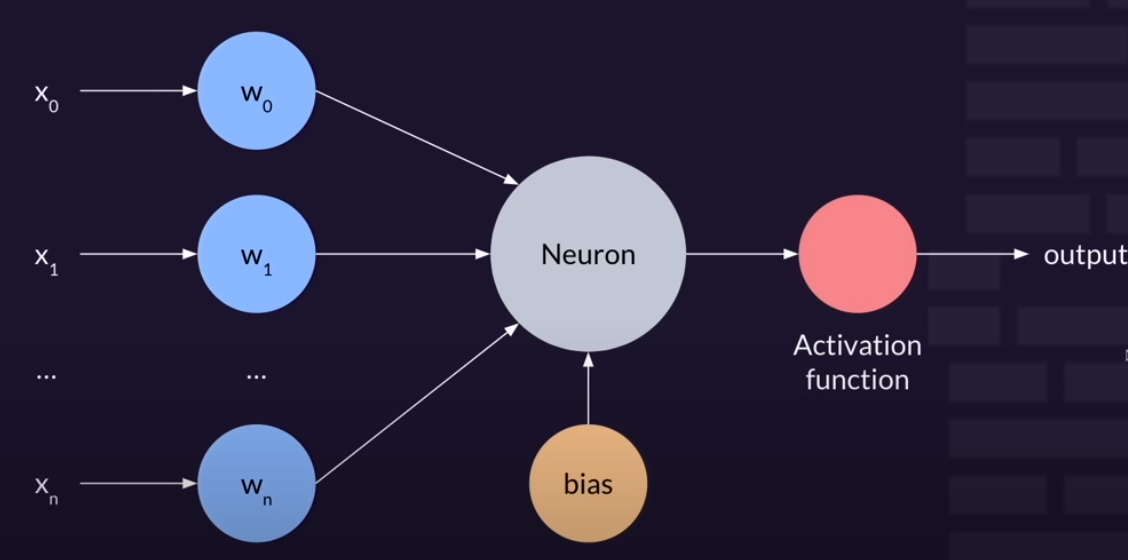

#Activation Function
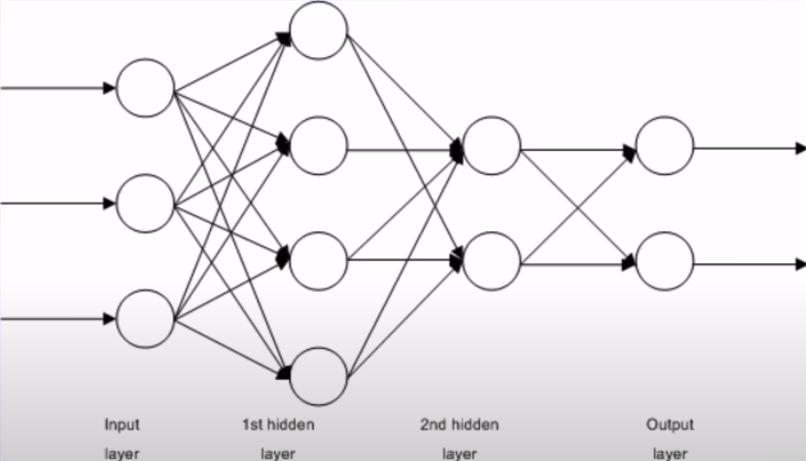

#Machine Learning Libraries
Tensorflow: open source library to help- us to develop and train ML models

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size):
  nm_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nm_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = nm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nm_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [32, 64, 128]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'num_nodes: {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        if val_loss[1] < least_val_loss:
          least_val_loss = val_loss[1]
          least_loss_model = model